In [3]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import anndata as ad
from scipy.sparse import csr_matrix
from biollm.repo.CellPLM.utils import set_seed
from biollm.repo.CellPLM.pipeline.cell_embedding import CellEmbeddingPipeline
import scanpy as sc
import matplotlib.pyplot as plt


In [4]:
PRETRAIN_VERSION = '20230926_85M'
DEVICE = 'cuda:1'

In [5]:
set_seed(42)
data = ad.read_h5ad('/home/share/huadjyin/home/s_qiuping1/workspace/omics_model/bio_model/biollm/case/data/zero-shot/gse155468.h5ad')
data.obs_names_make_unique()

In [6]:
model_path = '/home/share/huadjyin/home/s_qiuping1/workspace/omics_model/bio_model/biollm/case/models/cellplm/'
pipeline = CellEmbeddingPipeline(pretrain_prefix=PRETRAIN_VERSION, 
                                 pretrain_directory=model_path)
pipeline.model

OmicsFormer(
  (embedder): OmicsEmbeddingLayer(
    (act): ReLU()
    (norm0): GroupNorm(4, 1024, eps=1e-05, affine=True)
    (dropout): Dropout(p=0.2, inplace=False)
    (extra_linear): Sequential(
      (0): Linear(in_features=1024, out_features=1024, bias=True)
      (1): ReLU()
      (2): Dropout(p=0.2, inplace=False)
      (3): GroupNorm(4, 1024, eps=1e-05, affine=True)
    )
    (pe_enc): Sinusoidal2dPE(
      (pe_enc): Embedding(10000, 1024)
    )
    (feat_enc): OmicsEmbedder()
  )
  (mask_model): MaskBuilder()
  (encoder): TransformerEncoder(
    (layers): ModuleList(
      (0-3): 4 x FlowformerLayer(
        (self_attn): Flow_Attention(
          (query_projection): Linear(in_features=1024, out_features=1024, bias=True)
          (key_projection): Linear(in_features=1024, out_features=1024, bias=True)
          (value_projection): Linear(in_features=1024, out_features=1024, bias=True)
          (out_projection): Linear(in_features=1024, out_features=1024, bias=True)
         

In [7]:
embedding = pipeline.predict(data, # An AnnData object
                device=DEVICE) # Specify a gpu or cpu for model inference

data.obsm['emb'] = embedding.cpu().numpy()


Automatically converting gene symbols to ensembl ids...


INFO:biothings.client:querying 1-1000 ...
INFO:biothings.client:querying 1001-2000 ...
INFO:biothings.client:querying 2001-3000 ...
INFO:biothings.client:querying 3001-4000 ...
INFO:biothings.client:querying 4001-5000 ...
INFO:biothings.client:querying 5001-6000 ...
INFO:biothings.client:querying 6001-7000 ...
INFO:biothings.client:querying 7001-8000 ...
INFO:biothings.client:querying 8001-9000 ...
INFO:biothings.client:querying 9001-10000 ...
INFO:biothings.client:querying 10001-11000 ...
INFO:biothings.client:querying 11001-12000 ...
INFO:biothings.client:querying 12001-12382 ...
INFO:biothings.client:Finished.
INFO:biothings.client:Pass "returnall=True" to return complete lists of duplicate or missing query terms.


After filtering, 9985 genes remain.


In [8]:
embedding.shape

torch.Size([48082, 512])

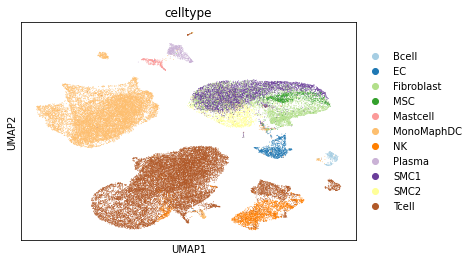

In [7]:
sc.pp.neighbors(data, use_rep='emb') # remove method='rapids' if rapids is not installed
sc.tl.umap(data) # remove method='rapids' if rapids is not installed
plt.rcParams['figure.figsize'] = (6, 6)
sc.pl.umap(data, color='celltype', palette='Paired')